In [43]:
import keras
keras.__version__

'2.5.0'

In [44]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [45]:
len(train_data), len(test_data)

(8982, 2246)

In [46]:
train_labels, test_labels                                              

(array([ 3,  4,  3, ..., 25,  3, 25]), array([ 3, 10,  1, ...,  3,  3, 24]))

In [47]:
len(train_labels), len(test_labels)

(8982, 2246)

In [48]:
# Decode it back to words

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [49]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [50]:
# Preparing the data

# Vectorize the  Trainign data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)



# Vectorize the training labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [51]:
# Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [52]:
# Building the network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Validating the approach ( lets apart 1000 samples from training data)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


# Train/fit the model (fro 20 epcohs)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/20
16/16 [==============================] - 2s 51ms/step - loss: 3.0238 - accuracy: 0.4222 - val_loss: 1.7058 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.4524 - accuracy: 0.6992 - val_loss: 1.3023 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.0729 - accuracy: 0.7721 - val_loss: 1.1311 - val_accuracy: 0.7730
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8303 - accuracy: 0.8280 - val_loss: 1.0386 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.6563 - accuracy: 0.8665 - val_loss: 0.9586 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5220 - accuracy: 0.8947 - val_loss: 0.9270 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4106 - accuracy: 0.9181 - val_loss: 0.9149 - val_accuracy: 0.8040
Epoch 8/20
16

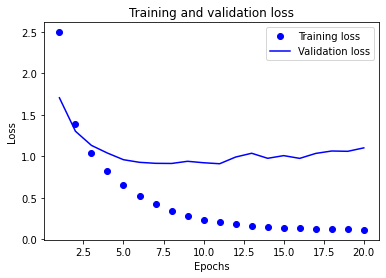

In [53]:
# display the Loss & Accuracy curve

# Plot Training & Validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


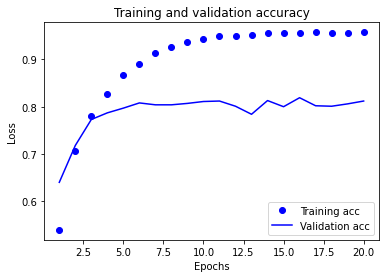

In [54]:
# Plotting Training & Validation acuuracy

plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:
## Retraining a model from scratch for epochs = 8 & then evaluate on test data
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/8
16/16 [==============================] - 2s 53ms/step - loss: 3.0832 - accuracy: 0.3731 - val_loss: 1.6724 - val_accuracy: 0.6640
Epoch 2/8
16/16 [==============================] - 1s 35ms/step - loss: 1.4902 - accuracy: 0.6894 - val_loss: 1.2715 - val_accuracy: 0.7170
Epoch 3/8
16/16 [==============================] - 1s 36ms/step - loss: 1.0791 - accuracy: 0.7669 - val_loss: 1.1293 - val_accuracy: 0.7660
Epoch 4/8
16/16 [==============================] - 1s 36ms/step - loss: 0.8361 - accuracy: 0.8244 - val_loss: 1.0139 - val_accuracy: 0.7910
Epoch 5/8
16/16 [==============================] - 1s 36ms/step - loss: 0.6514 - accuracy: 0.8661 - val_loss: 0.9527 - val_accuracy: 0.8050
Epoch 6/8
16/16 [==============================] - 1s 36ms/step - loss: 0.5232 - accuracy: 0.8965 - val_loss: 0.9468 - val_accuracy: 0.7930
Epoch 7/8
16/16 [==============================] - 1s 35ms/step - loss: 0.4246 - accuracy: 0.9126 - val_loss: 0.9167 - val_accuracy: 0.8140
Epoch 8/8
71/71 [===

In [56]:
results

[1.0064384937286377, 0.780053436756134]

In [57]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

In [58]:
# Generate prediction on new data
predictions = model.predict(x_test)

In [59]:
predictions[0].shape

(46,)

In [60]:
np.sum(predictions[0])

1.0000001

In [61]:
np.argmax(predictions[0])

3

In [62]:
## A differnet way to handle the labels & loss


y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [63]:
# A model with information BOTTLENECK
# On the importance of having sufficiently large intermediate layers
# Avoid intermediate layers (using 4 layers instead of 64)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))     # using 4 layers instead of 64
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.0958 - accuracy: 0.3878 - val_loss: 1.9213 - val_accuracy: 0.5630
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.6946 - accuracy: 0.5911 - val_loss: 1.6069 - val_accuracy: 0.5920
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4313 - accuracy: 0.6100 - val_loss: 1.4408 - val_accuracy: 0.6220
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.1862 - accuracy: 0.6775 - val_loss: 1.3477 - val_accuracy: 0.6790
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0376 - accuracy: 0.7472 - val_loss: 1.2988 - val_accuracy: 0.6920
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9145 - accuracy: 0.7683 - val_loss: 1.2739 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.8528 - accuracy: 0.7788 - val_loss: 1.2691 - val_accuracy: 0.7060
Epoch 8/20
63